In [1]:
%autosave 0

Autosave disabled


# EXPLORATION PHASE

In [2]:
# imported libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# custom module
import wrangle as w

In [3]:
train, val, test = w.wrangle_wine()

In [4]:
train.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
3761       0.516949          0.273333     0.186992        0.027607   0.129568   
3740       0.330508          0.133333     0.284553        0.225460   0.078073   
1359       0.661017          0.263333     0.325203        0.012270   0.136213   
1230       0.330508          0.066667     0.276423        0.032209   0.094684   
4751       0.322034          0.113333     1.000000        0.061350   0.043189   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
3761             0.123711              0.322485  0.148255  0.023622   
3740             0.206186              0.328402  0.244650  0.417323   
1359             0.034364              0.065089  0.191440  0.259843   
1230             0.096220              0.153846  0.146327  0.496063   
4751             0.343643              0.852071  0.059186  0.228346   

      sulphates   alcohol   quality  
3761   0.125000  0.231405  0.500000  
3740   0.159091  0.264463  0.333333  
1359   0.244318  0.336088  0.500000  
1230   0.318182  0.628099  0.500000  
4751   0.119318  0.842975  0.500000

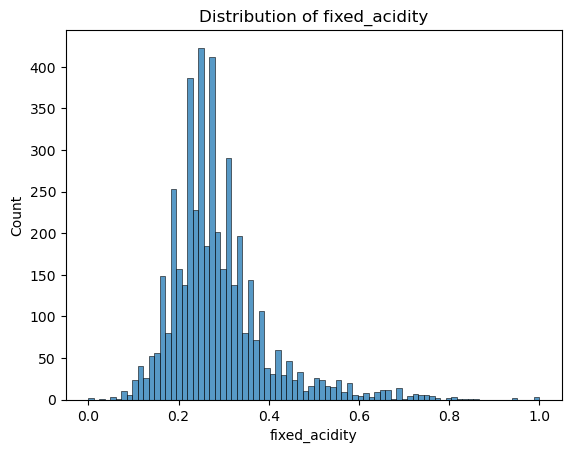

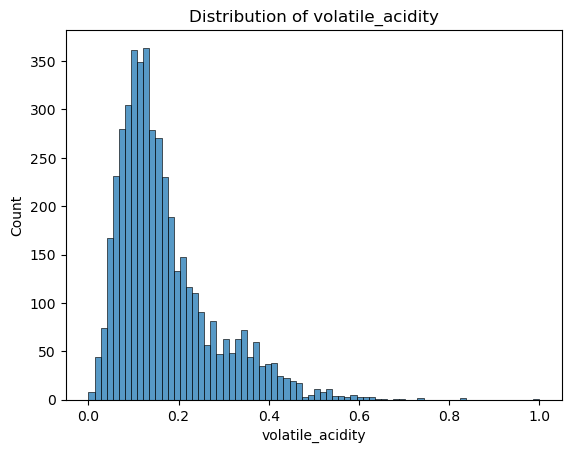

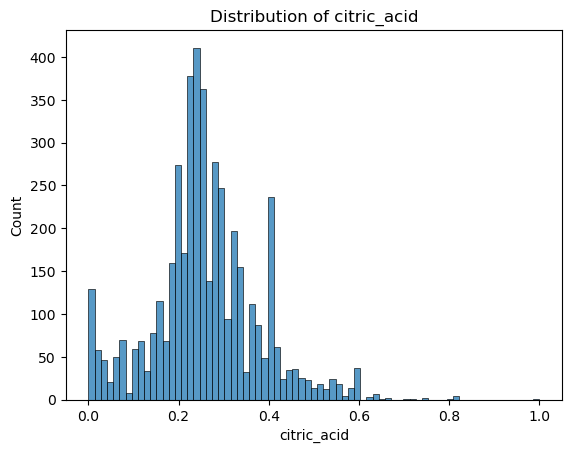

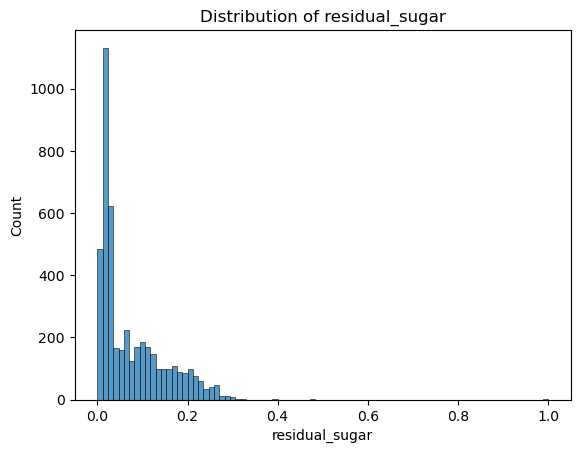

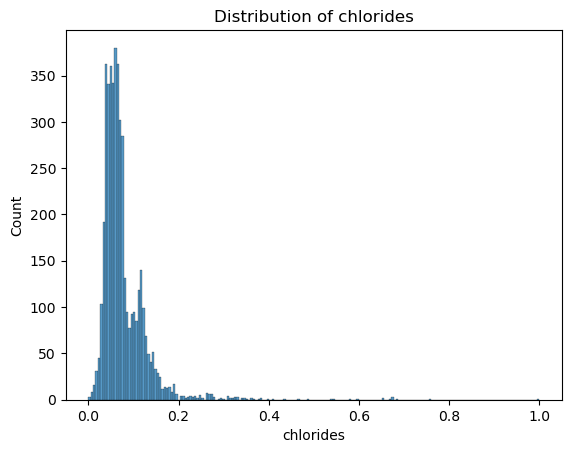

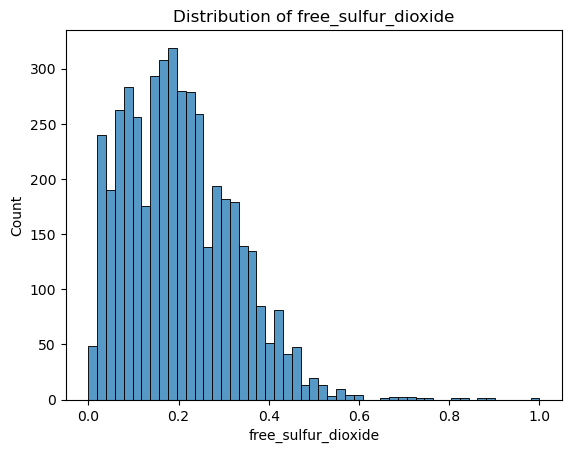

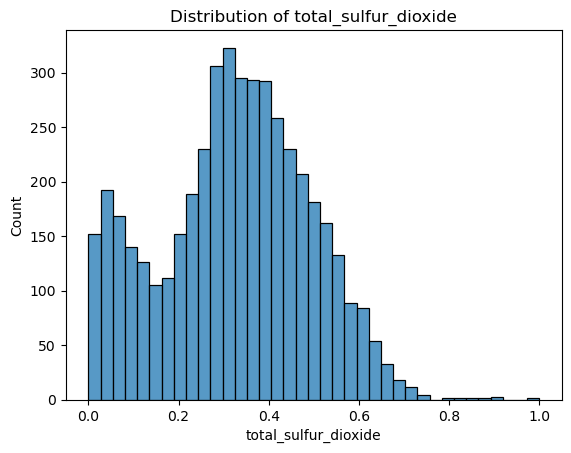

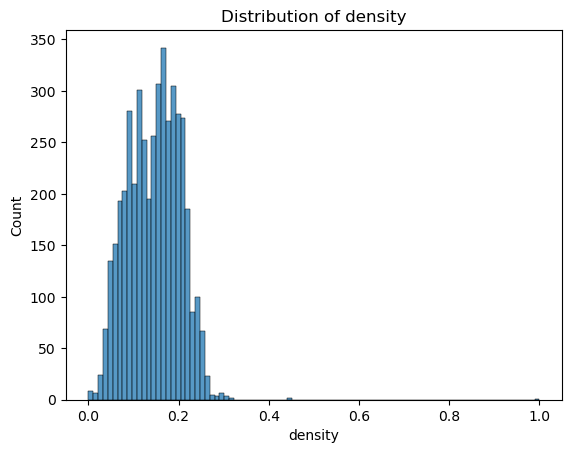

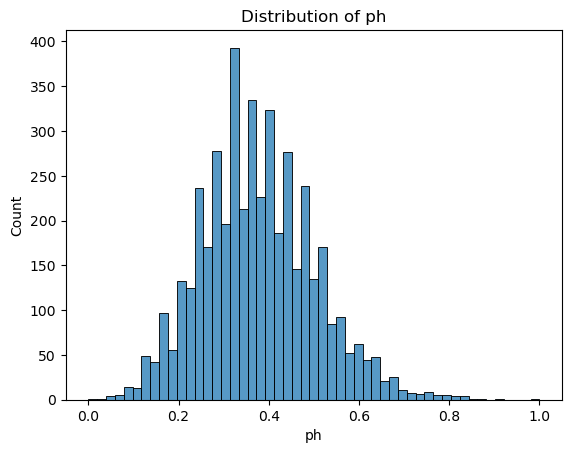

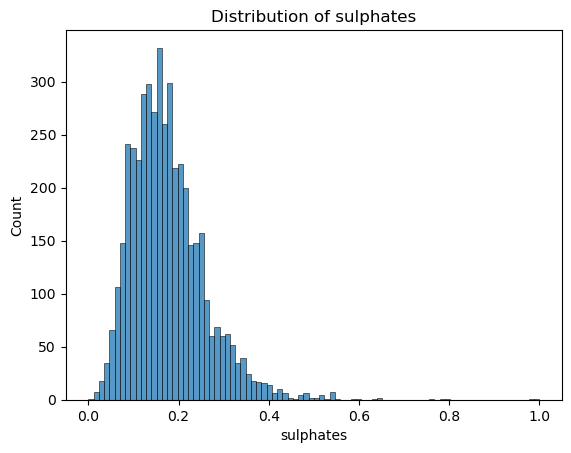

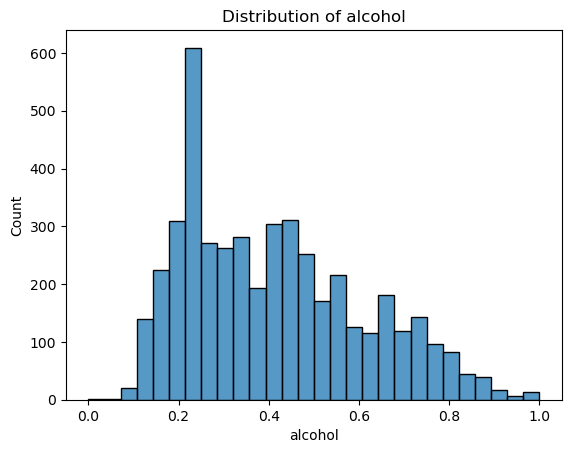

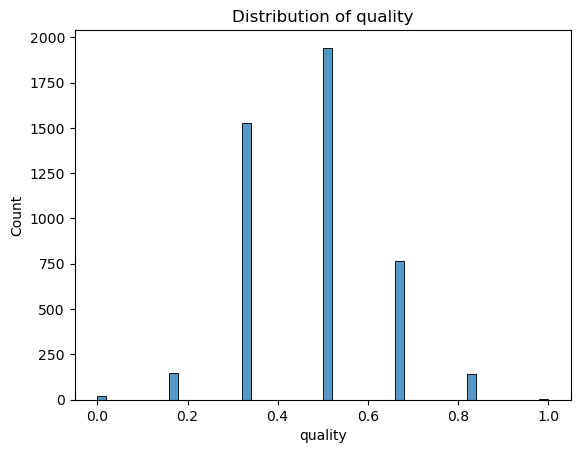

In [5]:
# data distribution
for col in train.columns[train.dtypes == 'float64']:
    plt.figure()
    plt.title(f'Distribution of {col}')
    sns.histplot(data=train, x=col)
    plt.show()

In [6]:
numericals = ['fixed_acidity',
             'volatile_acidity',
             'citric_acid',
             'residual_sugar',
             'chlorides',
             'free_sulfur_dioxide',
             'total_sulfur_dioxide',
             'density',
             'ph',
             'sulphates',
             'alcohol',
             'quality']

/opt/homebrew/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


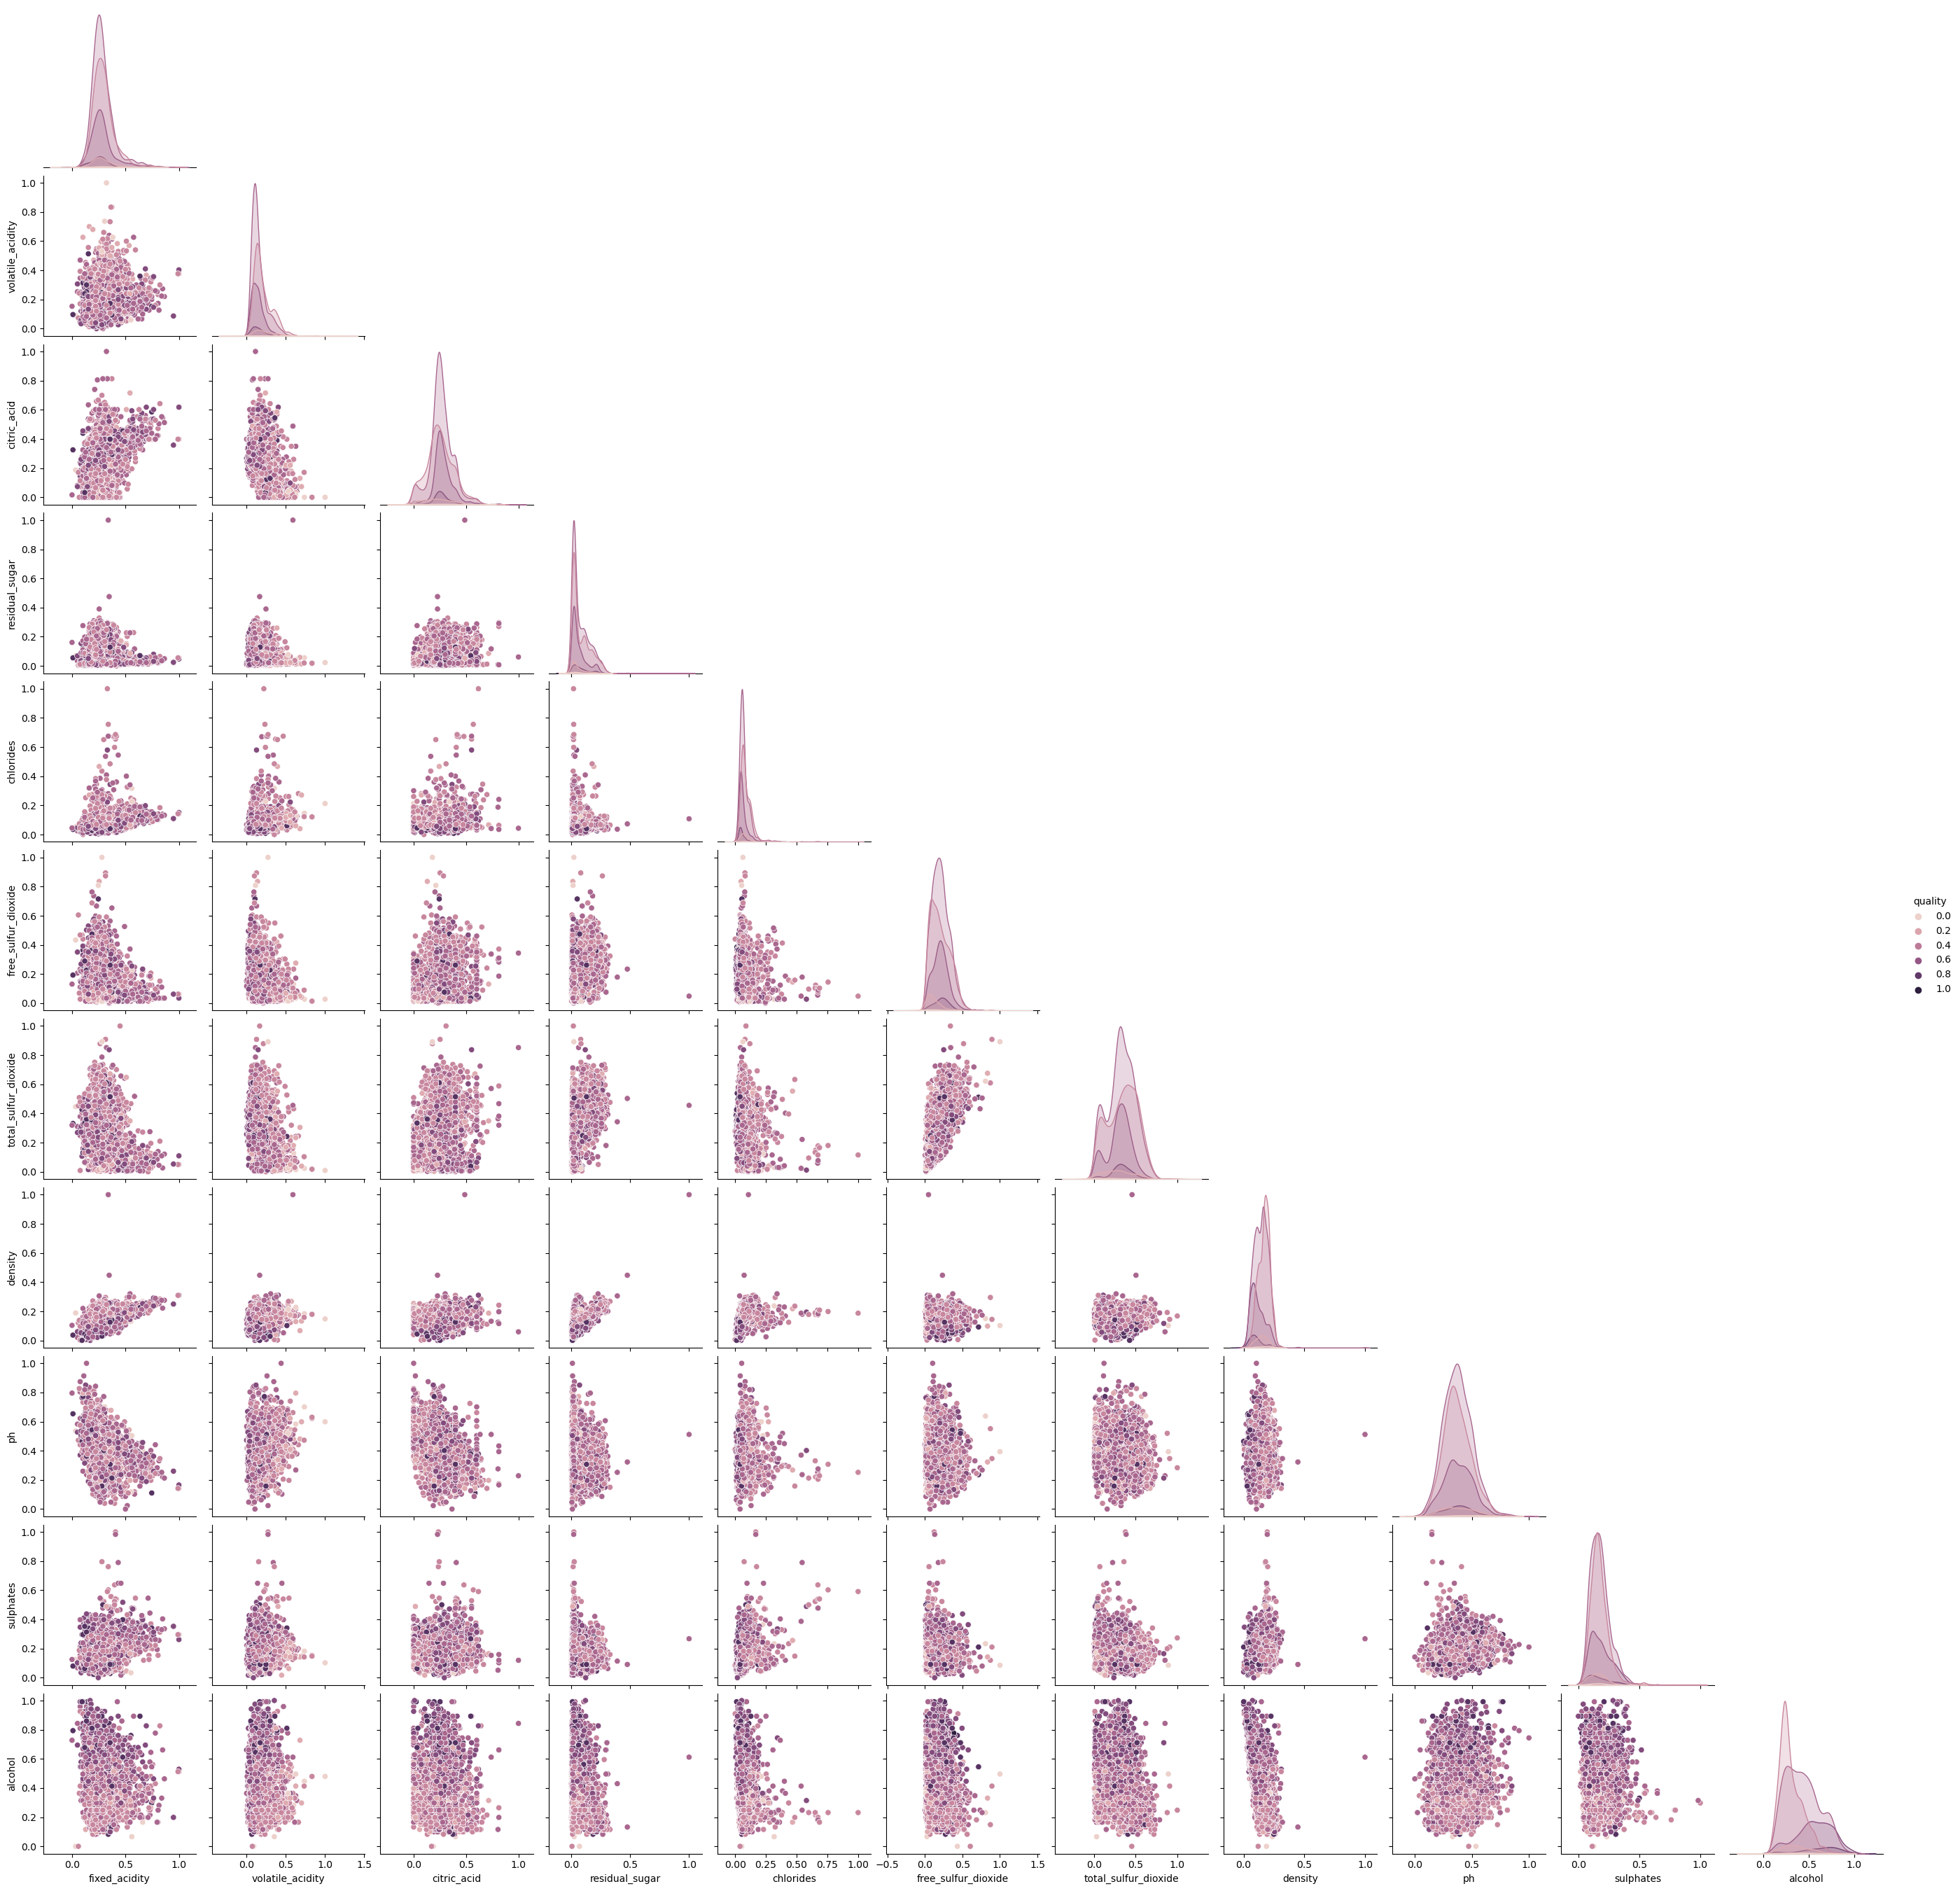

In [7]:
sns.pairplot(data=train[numericals], hue='quality', corner=True)

In [8]:
train.columns.to_list()

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'ph',
 'sulphates',
 'alcohol',
 'quality']

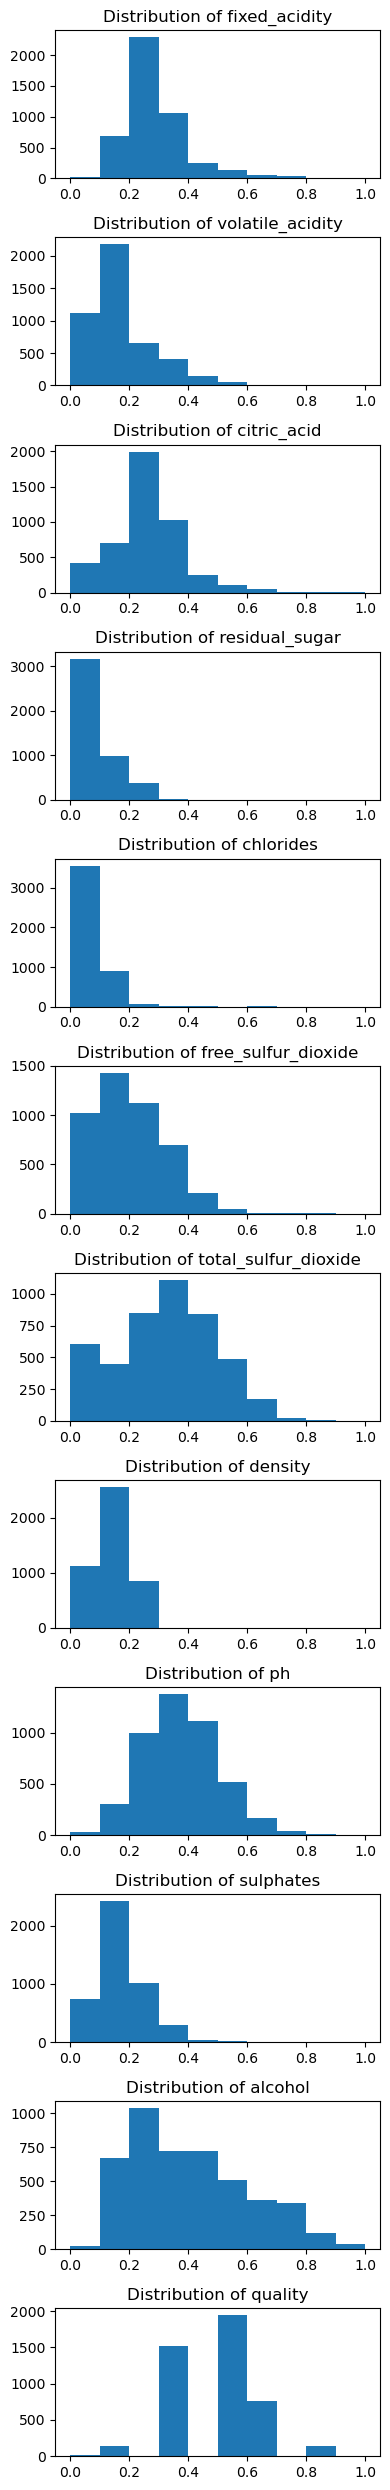

In [9]:
fig, axs = plt.subplots(12,1, figsize=(4,25))
for col, ax in zip(numericals, axs):
    ax.hist(train[col])
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [10]:
# train['alcohol_bins'] = pd.cut(train['alcohol'], bins=[0, 1.0, 100])

## scaled features cannot be explored thoroughly, so i am importing only the clean version to explore.

In [11]:
df = w.clean_wine()

In [12]:
df.head(2)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  
0      9.4        5  
1      9.8        5

In [13]:
numericals2 = ['fixed_acidity',
             'volatile_acidity',
             'citric_acid',
             'residual_sugar',
             'chlorides',
             'free_sulfur_dioxide',
             'total_sulfur_dioxide',
             'density',
             'ph',
             'sulphates',
             'alcohol',
             'quality']

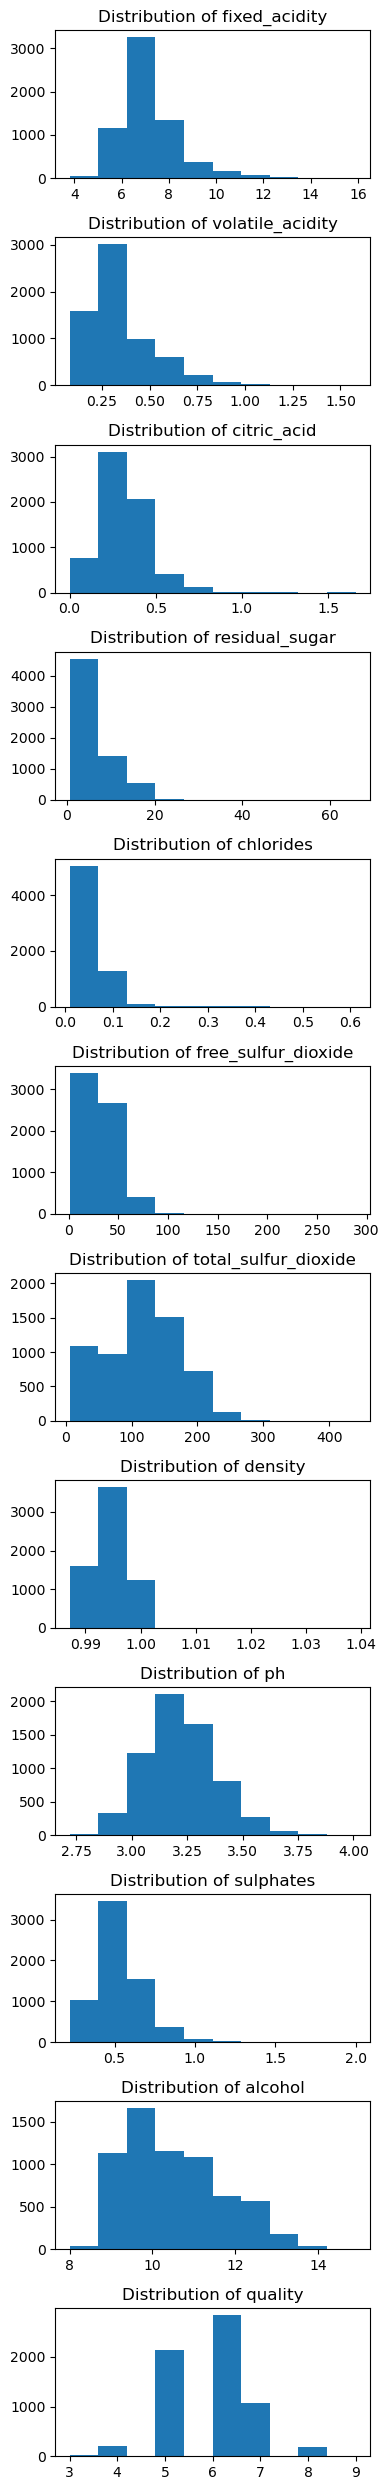

In [14]:
fig, axs = plt.subplots(12,1, figsize=(4,25))
for col, ax in zip(numericals2, axs):
    ax.hist(df[col])
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Q1. Is alcohol dependent on quality of wine?

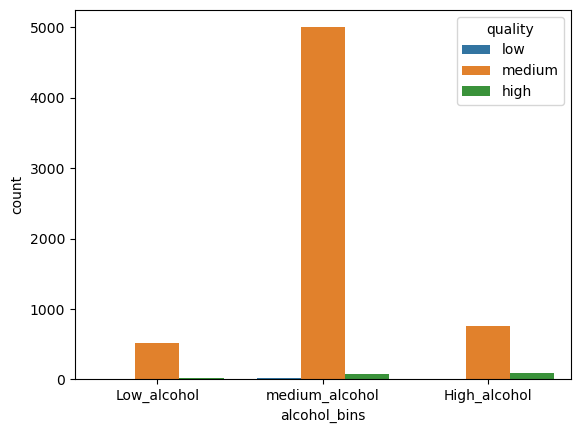

In [15]:
df['alcohol_bins'] = pd.cut(df['alcohol'],[0, 9, 12, 15], labels=['Low_alcohol','medium_alcohol', 'High_alcohol'])
df['quality'] = pd.cut(df['quality'], [0, 3, 7, 10], labels=['low', 'medium', 'high'])

sns.countplot(data=df, x='alcohol_bins', hue='quality')
plt.show()

/opt/homebrew/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


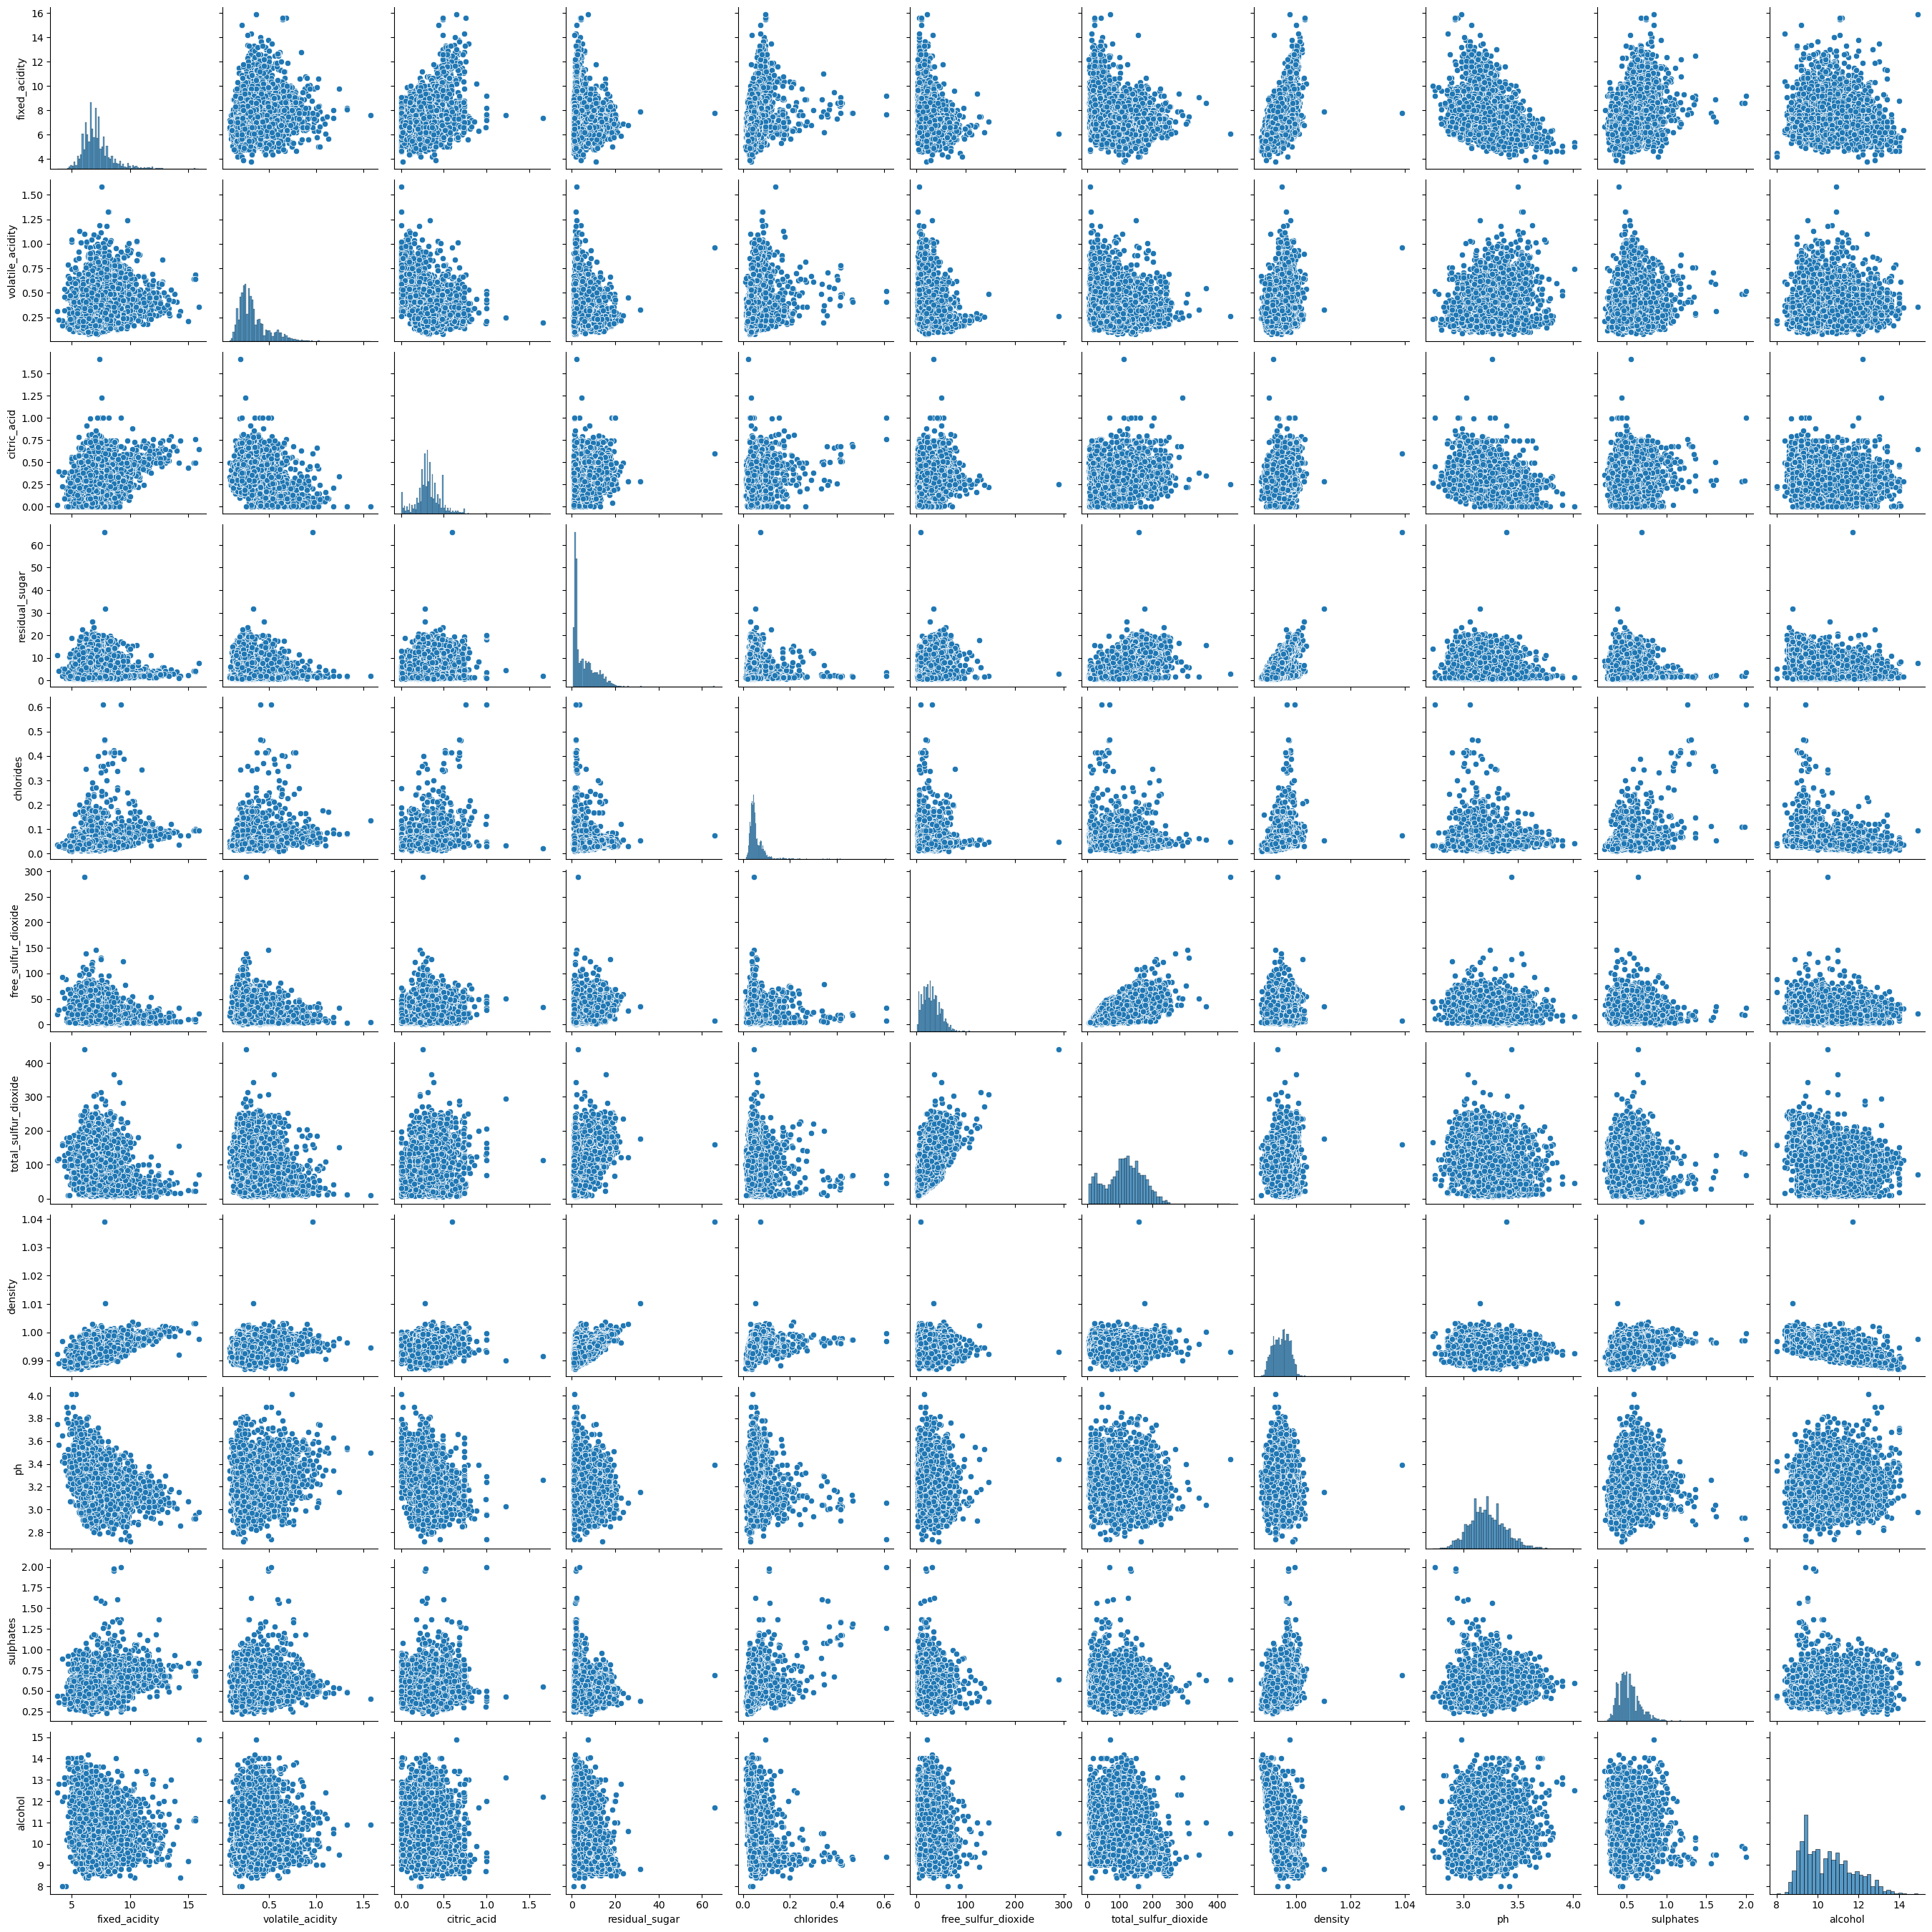

In [16]:
sns.pairplot(data=df)
plt.show()